In [2]:
from fastai.vision import *

In [4]:
bs = 16 
path = '/home/jefferson/Dropbox/Jefferson/rotinas_python/IA/molec_IA'

In [7]:
np.random.seed(10)
data = ImageDataBunch.from_folder(path, train='', valid_pct=0.2,
                                 ds_tfms = get_transforms(),
                                 size = 224, bs = bs).normalize(imagenet_stats)

In [10]:
data.classes

['alcool', 'cetona']

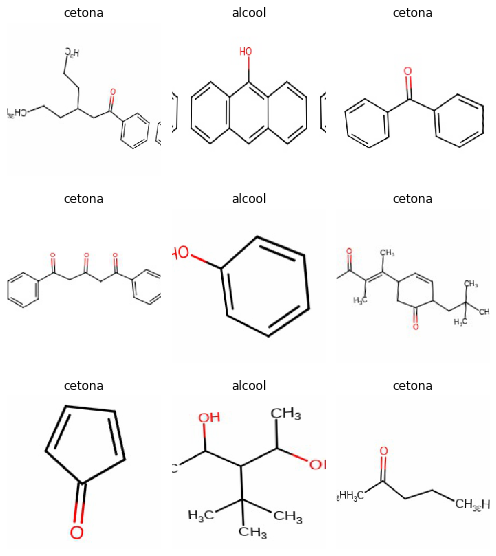

In [13]:
data.show_batch(rows = 3, figsize = (7, 8))

In [16]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jefferson/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [18]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.120702,0.955889,0.333333,00:11
1,0.150460,1.254545,0.333333,00:11
2,0.131432,1.524139,0.333333,00:11
3,0.110065,1.797751,0.416667,00:11
4,0.156466,1.792834,0.333333,00:12
5,0.178222,1.690284,0.333333,00:11


# Interpretation

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
interp.most_confused(min_val=2)

[('cetona', 'alcool', 3)]

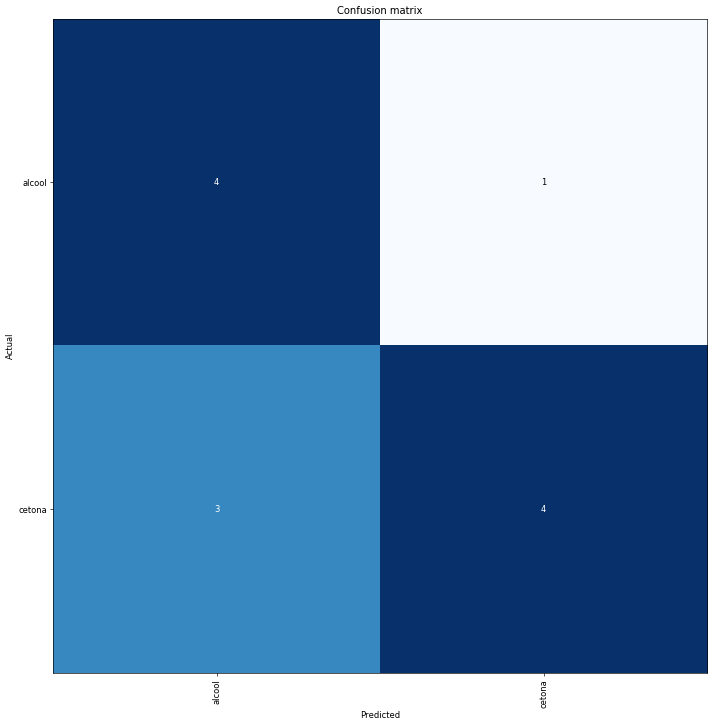

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi = 60)

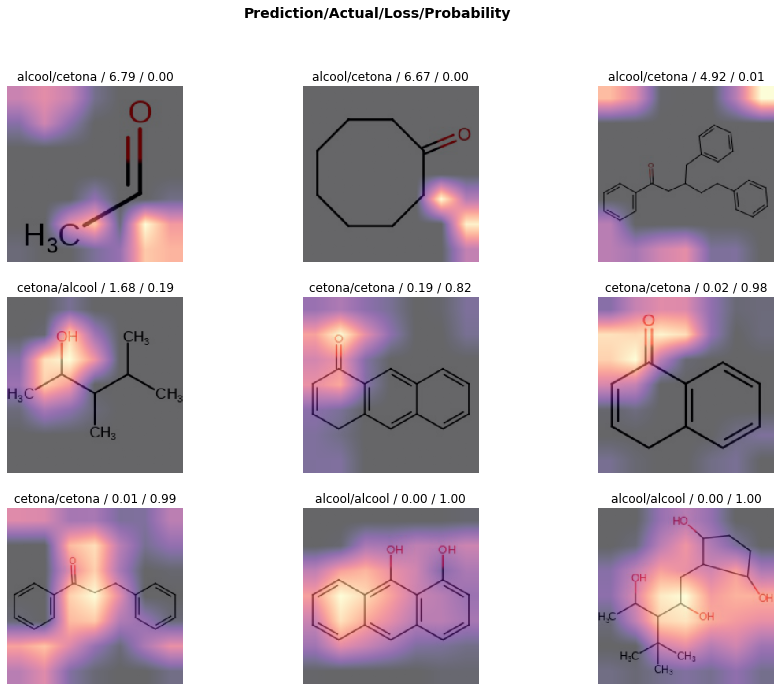

In [23]:
interp.plot_top_losses(9, figsize = (15,11), heatmap=True)

# Retreinar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


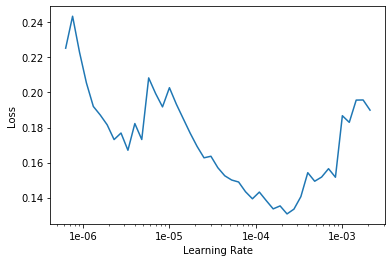

In [24]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

# Nova interpretação

In [25]:
interp2 = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('cetona', 'alcool', 3)]

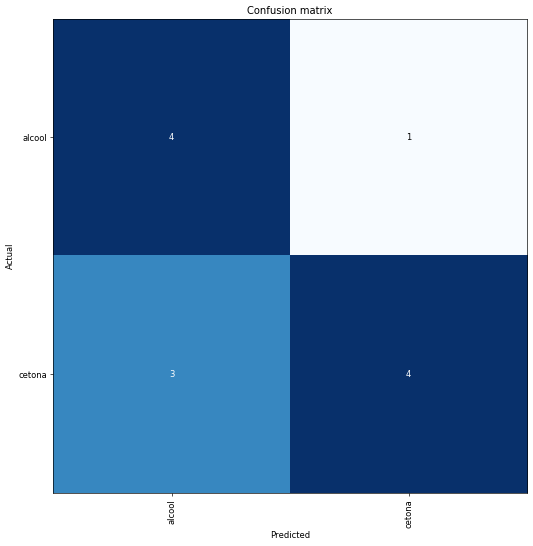

In [26]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)

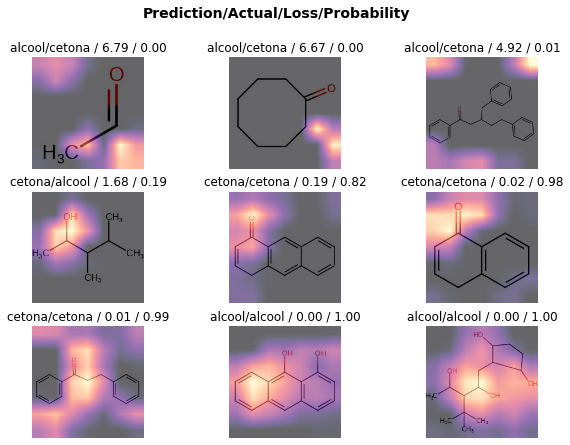

In [27]:
interp.plot_top_losses(9, figsize=(10, 7), heatmap=True)

### É necessário treinar novamente

In [29]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.356270,7.867944,0.583333,00:16
1,0.210320,7.100489,0.666667,00:16
2,0.218429,6.256290,0.583333,00:16
3,0.197176,5.424452,0.500000,00:16
4,0.153878,4.938704,0.500000,00:16
5,0.227741,4.732444,0.500000,00:16
6,0.197529,4.756653,0.500000,00:16
7,0.184755,4.683995,0.500000,00:16


In [34]:
learn.fit(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.006122,2.424607,0.166667,00:17
1,0.050881,2.282147,0.166667,00:17
2,0.042644,2.092998,0.166667,00:19
3,0.031061,1.894587,0.166667,00:18
4,0.026915,1.775610,0.166667,00:16
5,0.028417,1.772130,0.166667,00:16
6,0.026500,1.756491,0.166667,00:16
7,0.023435,1.698138,0.166667,00:16


# Interpretation 3

In [38]:
interp3 = ClassificationInterpretation.from_learner(learn)
interp3.most_confused(min_val=2)

[('cetona', 'alcool', 2)]

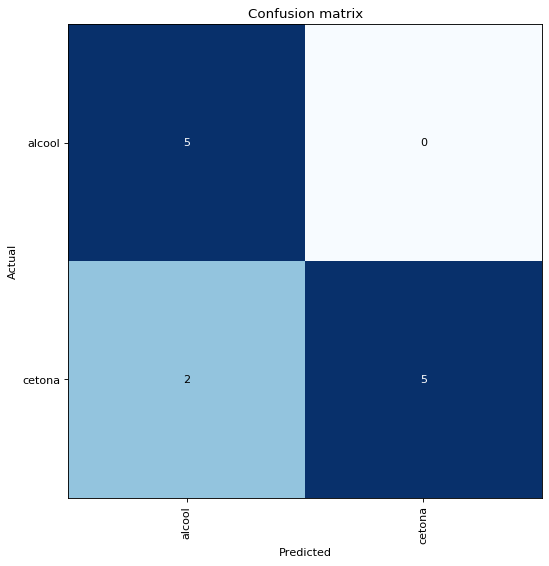

In [41]:
interp3.plot_confusion_matrix(figsize = (7,7), dpi = 80)

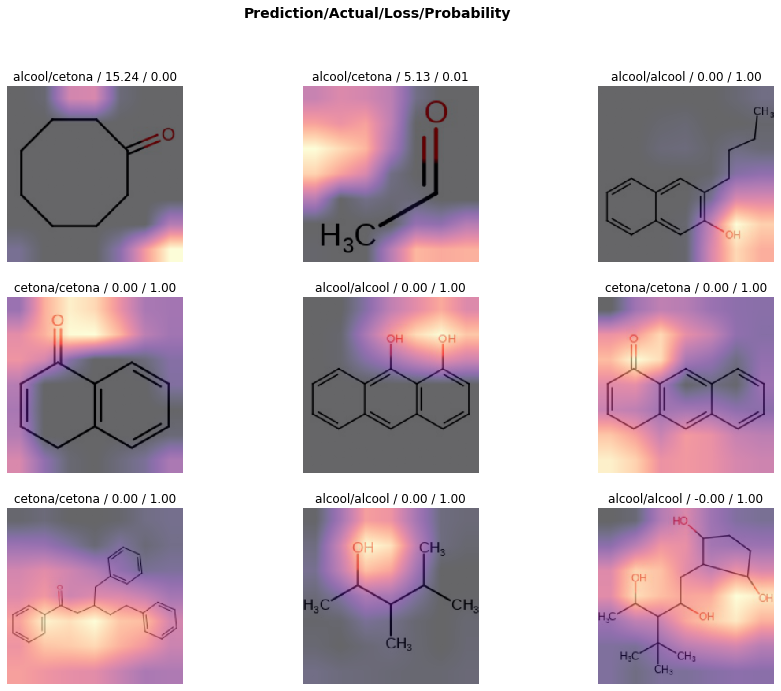

In [45]:
interp3.plot_top_losses(9, figsize = (15, 11), heatmap = True)